Who are your stakeholders for this project?
The stakeholders are the HR department and the managers and senior leadership / executives in the company.

What are you trying to solve or accomplish?
I have been tasked with creating a predictive model to identify which employees will churn.  Hiring new workers is very costly.  If we can identify those employees likely to churn, we can take steps to mitigate it.

What are your initial observations when you explore the data?
It looks like there are many possibilities for the reason(s) why employees churn.  It looks like the survey asked good questions.

What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Old labs in this program.  Python, scikit, pandas, and other documentation on the web.

Do you have any ethical considerations in this stage?
None whatsoever.

In [247]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [248]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_comma_sep.csv")

In [249]:
# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [250]:
df0.shape

(14999, 10)

In [251]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [252]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [253]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [254]:
# Rename columns as needed
df0 = df0.rename({"Work_accident":"work_accident", "Department":"department", "time_spend_company":"tenure"}, axis=1)

In [255]:
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [256]:
df0['work_accident'].unique()

array([0, 1])

In [257]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values

In [258]:
# Check for duplicates
df0.duplicated().sum()

3008

In [259]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [260]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0 = df0.drop_duplicates(keep='first')

In [261]:
df0.shape

(11991, 10)

In [262]:
df0.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

In [263]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


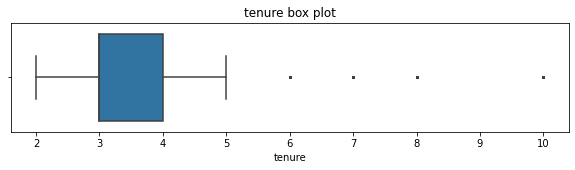

In [264]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,2))
sns.boxplot(x=df0['tenure'], fliersize=1)
plt.title('tenure box plot');

In [265]:
# Determine the number of rows containing outliers
# This is from the project exemplar

percentile25 = df0['tenure'].quantile(.25)

percentile75 = df0['tenure'].quantile(.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Range of non-outlier values: ({lower_limit}, {upper_limit})")

outliers = df0[(df0['tenure'] > upper_limit)| (df0['tenure'] < lower_limit)]
print(len(outliers))

Range of non-outlier values: (1.5, 5.5)
824


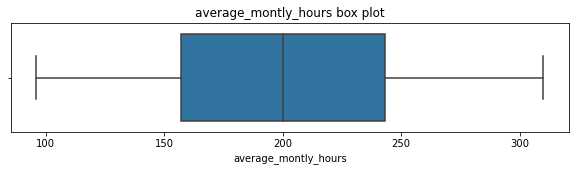

In [266]:
# Create a boxplot to visualize distribution of `average_montly_hours` and detect any outliers
plt.figure(figsize=(10,2))
sns.boxplot(x=df0['average_montly_hours'], fliersize=1)
plt.title('average_montly_hours box plot');

In [267]:
# Get numbers of people who left vs. stayed
df0['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [268]:
# Get percentages of people who left vs. stayed
df0['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

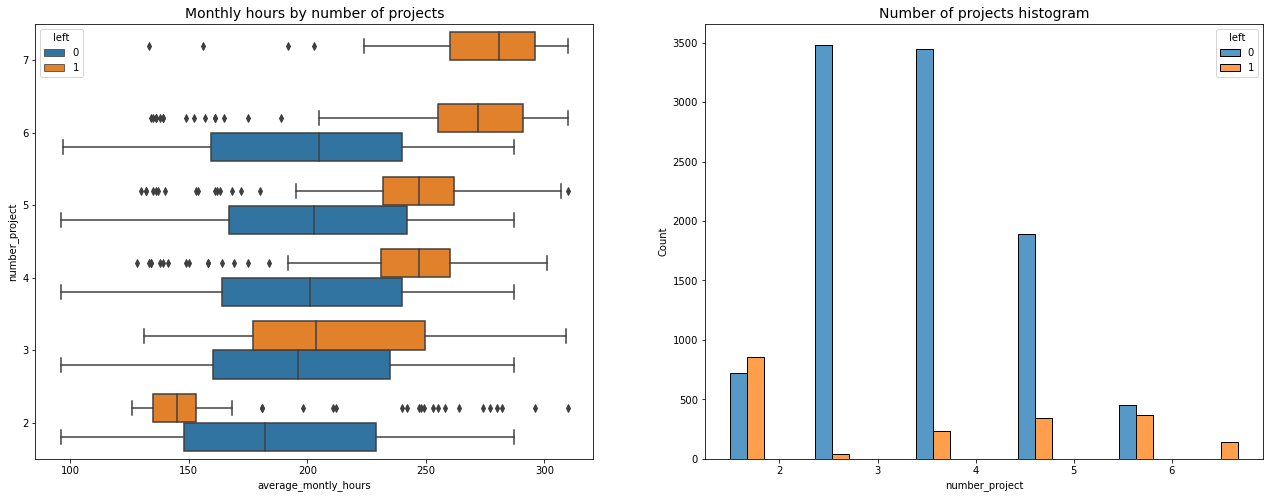

In [269]:
# Create a plot as needed
# This is from the project exemplar

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing average_monthly_hours distributions for project_number, comparing employees who stayed vs.
# those that left
sns.boxplot(data=df0, x='average_montly_hours', y="number_project", hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize='14')

# Create histogram showing distribution of number_project, comparing employees who stayed versus those that left
sns.histplot(data=df0, x='number_project', hue='left', multiple='dodge', shrink=2,ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize='14')

plt.show()


Naturally, the average_monthly_hours is higher the more projects are worked.

There are two groups of employees who left the company:
A.  those who worked considerably less than their peers with the same number of projects.
B.  those who worked much more.
For group A, it's possible these people were fired.  Or, they had been given fewer projects because they were already on their way out the door.
For those in group B, it's reasonable to infer that they probably quit.  They likely contributed to a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was around 255-295, much more than any other group.

The optimal number of projects for employees to work on seems to be 3-4.  The ratio of left/stayed is very small for these cohorts.

Aside from the employees who worked on two projects, every group, even those who didn't leave the company -- worked considerably more hours than your typical 40-50 hours a month.  It seems that the employees here are overworked.


In [270]:
# Get value counts of stayed and left for employees with 7 projects
df0[df0['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by satisfaction_level')

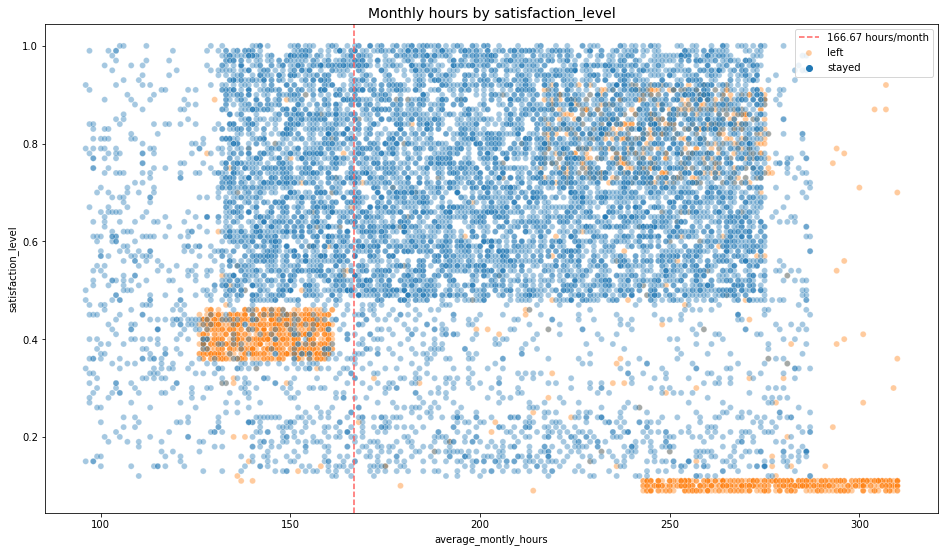

In [271]:
# Create a scatterplot of average_monthly_hours vs satisfaction_level, comparing employees who stayed vs. left
# This is from the project exemplar

plt.figure(figsize=(16,9))
sns.scatterplot(data=df0, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color="#ff6361", label = "166.67 hours/month", ls='--')
plt.legend(labels=['166.67 hours/month', 'left', 'stayed' ])
plt.title("Monthly hours by satisfaction_level", fontsize=14)

There are 3 big groups of employees who left.  There are those with a satisfaction_level of around .4 and worked from around 125 to 160 hours a week.  It might be these employees are tuned out and were on the way out anyway.  There is a group with a satisfaction_level of below .1 who worked over ~240 hours a week.  These might be burnt out employees.  There is another group with high satisfaction scores who worked ~225- ~275 hours a week.  These might be high performers who got offers elsewhere.

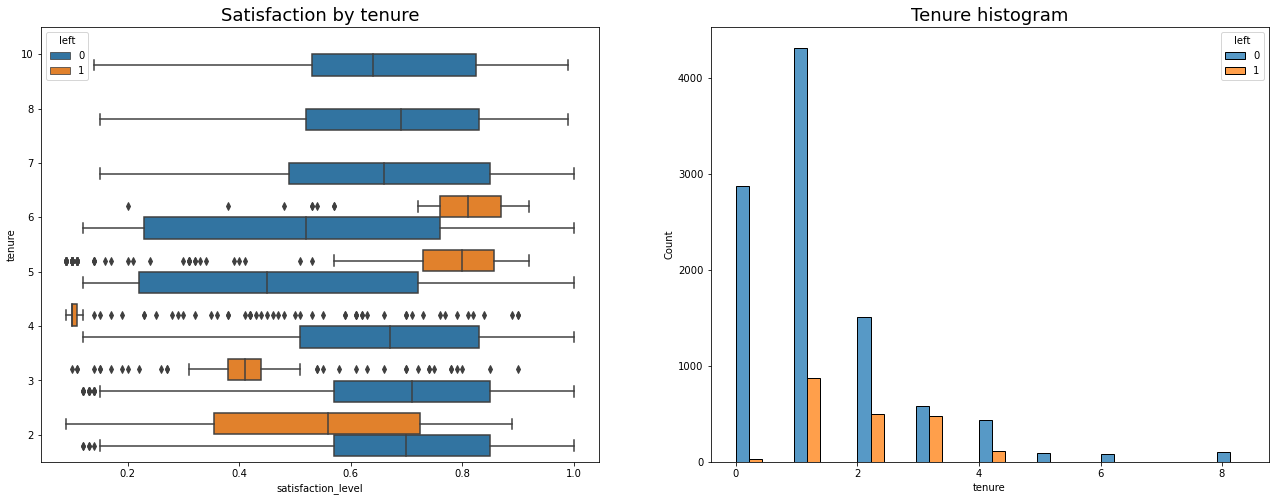

In [272]:
# This is from the project exemplar

fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Visualize satisfaction_level by tenure, comparing employees who stayed vs those who left
sns.boxplot(data = df0, x="satisfaction_level", y="tenure", orient="h", ax=ax[0], hue="left")
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction by tenure", fontsize='18')

# Create histogram showing distribution of tenure, comparing employees who stayed versus those who left
sns.histplot(data=df0, x="tenure", hue='left', multiple='dodge', shrink=5, ax=ax[1])

ax[1].set_title("Tenure histogram", fontsize=18)

plt.show()

There are two general categories of employees who left.  There are those with shorter tenures with low satisfaction_level.  These might be disengaged employees or employees who are not satisfied with growth.  Then there are those with medium tenure and high satisfaction_level.  These might be high performing employees that get jobs elsewhere.
Then, there are some 4-year employees with very low satisfaction that left.  We should investigate what it is about the 4 year mark that is causing these employees to leave.
The longest tenured employees did not leave.  Their satisfaction levels align with those of newer employees who stayed.
This histogram shows there are fewer longer tenured employees.  It's possible that they're higher ranking, higher paid employees.


In [273]:
# Calculate the mean and median satisfaction scores of employees who left and those who stayed
df0.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction_level for those who left are lower than those who stayed.

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

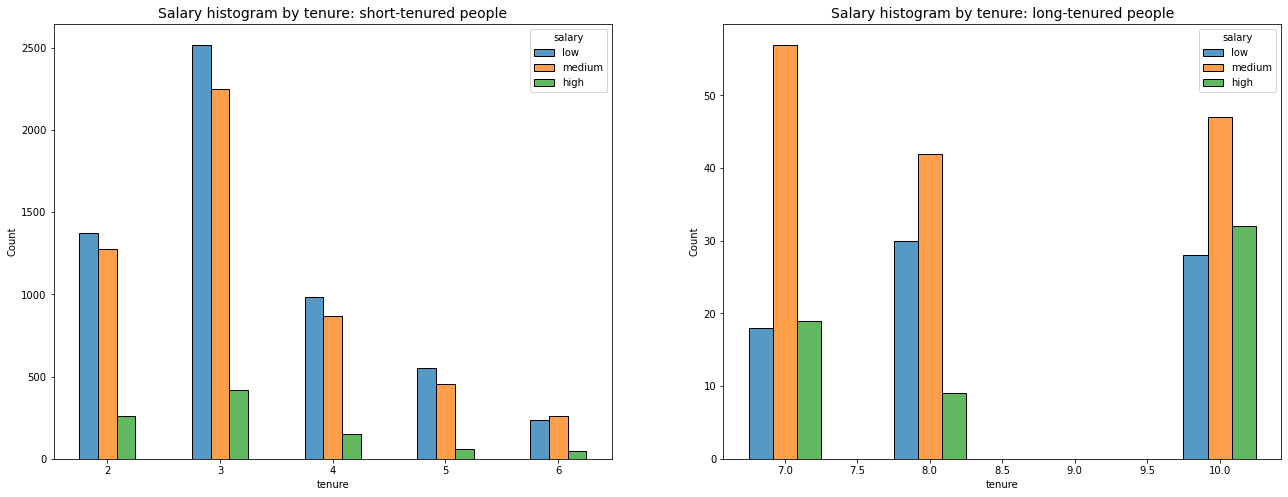

In [274]:
# This is from the project exemplar

fig, ax = plt.subplots(1, 2, figsize = (22, 8))

tenure_short = df0[df0['tenure'] < 7]

tenure_long = df0[df0['tenure'] > 6]

# Plot salary level for short-tenured employees
sns.histplot(data = tenure_short, x='tenure', hue='salary', discrete = 1,
                hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot salary level for long-tenured employees
sns.histplot(data = tenure_long, x='tenure', hue='salary', discrete = 1,
                hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

Longer tenured employees are not disproportionately higher salaried

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

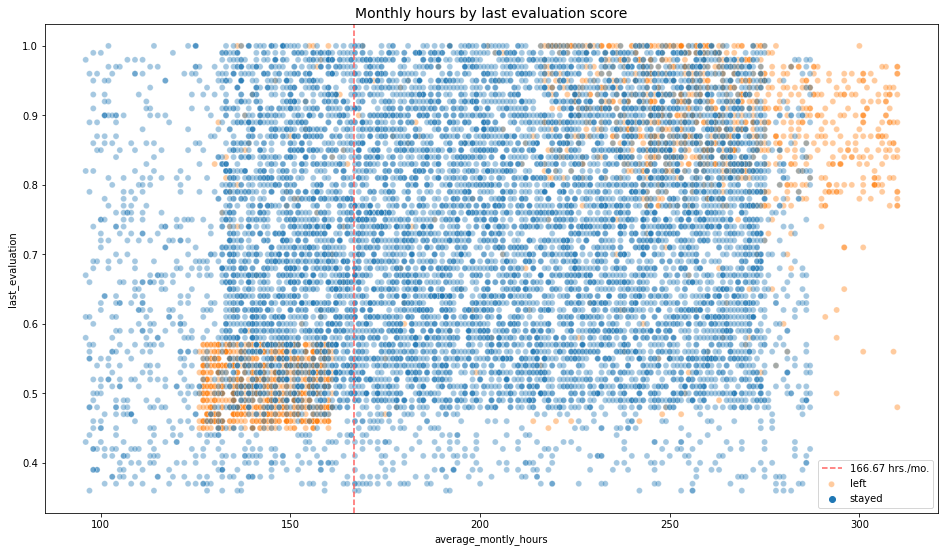

In [275]:
# This is from the project exemplar

# Create a scatterplot of average_montly_hours vs last_evaluation
plt.figure(figsize=(16,9))
sns.scatterplot(data=df0, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs.mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')


There are two groups of employees who left.  The first group worked an extreme amount of hours and were highly evaluated.  The first group might be highly productive employees who found jobs elsewhere.  The second group worked few hours and had lower evaluation scores.

There is a correlation between hours worked and evaluation score.

There aren't a lot of employees in the upper left quadrant.  But working longer hours doesn't guarantee a higher evaluation score either.

Most of the employees in this company work well over 167 hours per month.  They may be overworked.

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

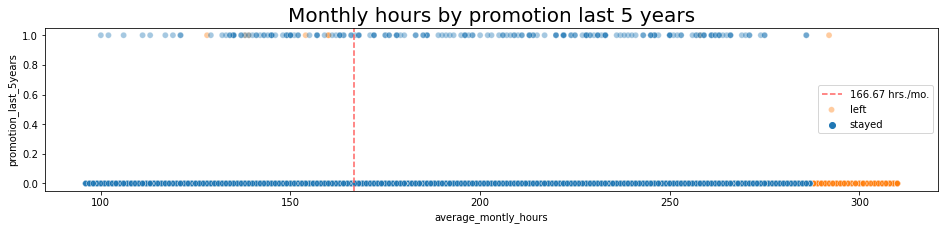

In [276]:
# This is from the project exemplar

# Create a plot to examine the relationship between average-montly_hours and promotion_last_5years
plt.figure(figsize=(16,3))
sns.scatterplot(data=df0, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize = 20)

Very few employees who were promoted in the last 5 years left.
Very few employees who worked the most hours were promoted.
All of the employees who left were working the longest hours.

In [277]:
# Display employee counts for each department
df0['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

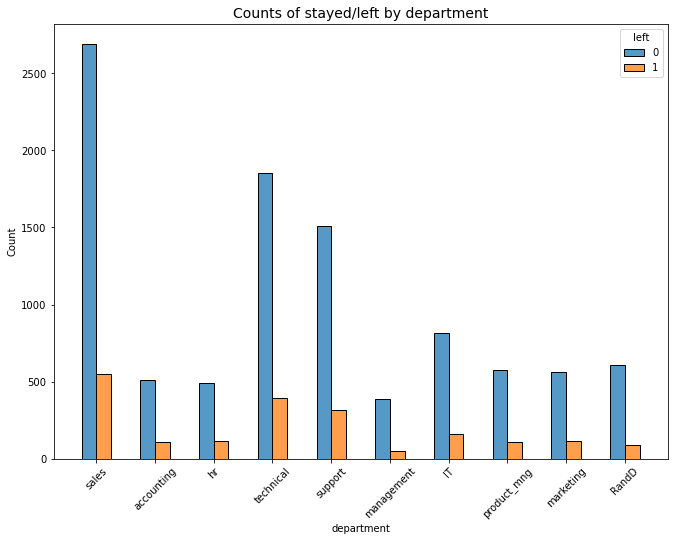

In [278]:
# This is from the project exemplar

# Create a visualization to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df0, x='department', hue='left', discrete= 1, hue_order=[0,1], 
            multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14)

There is not any department that differs significantly in its proportion of employees who left to those who stayed.

Text(0.5, 1.0, 'Counts of stayed/left by salary')

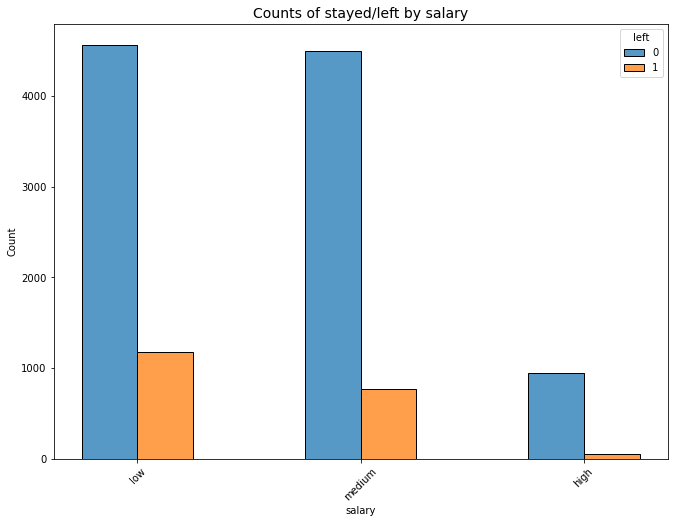

In [279]:
# Create a visualization to compare salary distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df0, x='salary', hue='left', discrete= 1, hue_order=[0,1], 
            multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by salary', fontsize=14)

In [287]:
df0.groupby('salary')['satisfaction_level'].mean()

salary
high      0.643343
low       0.622655
medium    0.634723
Name: satisfaction_level, dtype: float64

Salary does not influence satisfaction_level

Text(0.5, 1.0, 'Counts of stayed/left by promotion_last_5years')

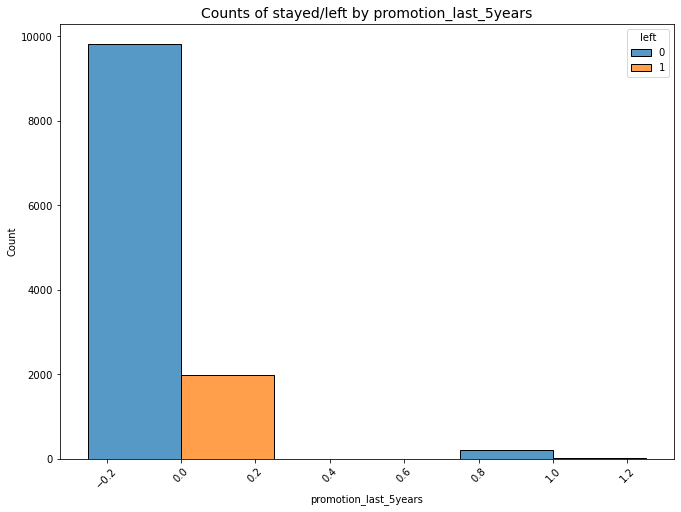

In [288]:
# Create a visualization to compare distribution of employees who left to that of employees who didn't based on
# whether they were promoted in the last 5 years
plt.figure(figsize=(11,8))
sns.histplot(data=df0, x='promotion_last_5years', hue='left', discrete= 1, hue_order=[0,1], 
            multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by promotion_last_5years', fontsize=14)

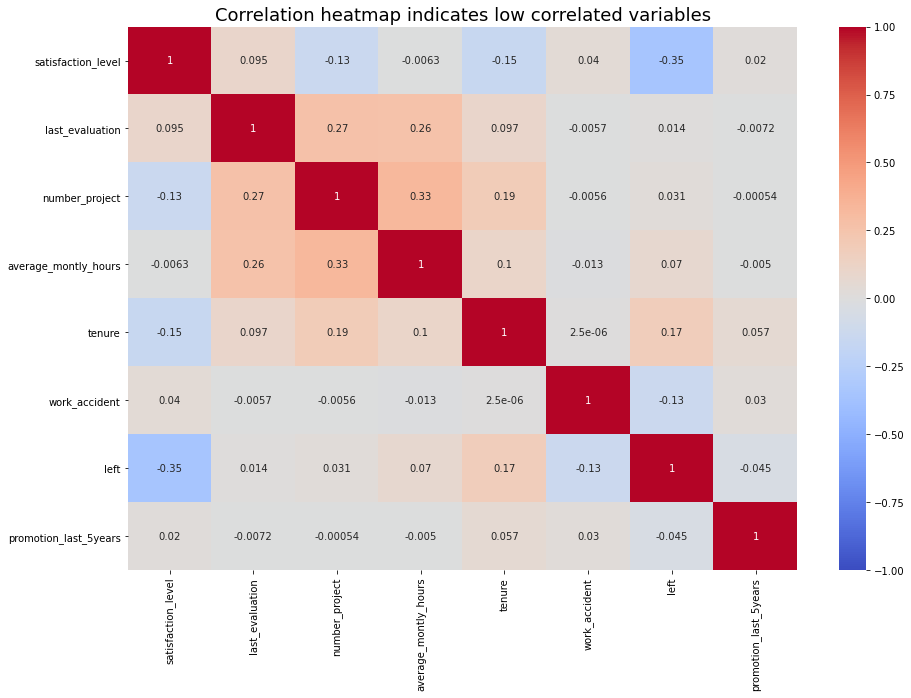

In [200]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df0.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates low correlated variables',
          fontsize=18)
plt.show();


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and that whether an employee leaves is negatively correlated with their satisfaction level.

- What did you observe about the relationships between variables?
The variables are all lowly correlated with each other.  None come close to the 0.7 threshold of correlation where we would have to eliminate one in a pairing of variables.

- What do you observe about the distributions in the data?
N/A

- What transformations did you make with your data? Why did you chose to make those decisions?
Change the salary column to a numeric ranking for modeling purposes.  Eliminate outlier tenured employees as logistic regression does handle outliers well.  Changed the department column to multiple columns for each department and a value of 1 if the employee is in the department and 0 if the employee is not in the department.

- What are some purposes of EDA before constructing a predictive model?
You want to see what variables are appropriate to include in the model.  In some models, variables must be linearly correlated with the target variable.  

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Labs and lecture slides from this course.  Official documentation for python and the imported libraries, like pandas.

- Do you have any ethical considerations in this stage?
None whatsoever.

It looks like employees are leaving as a result of poor management.  Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels.  It also appears that if an employee has spent more than six years at the company, they tend to leave.

- Do you notice anything odd?
No

- Which independent variables did you choose for the model and why?
I used all the variables except the target variable.

- Are each of the assumptions met?
Yes

- How well does your model fit the data?
Not very well

- Can you improve it? Is there anything you would change about the model?
N/A

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
Labs and lectures and readings in this course.  Official documentation.

- Do you have any ethical considerations in this stage?
No

In [201]:
dict = {"low" : 0, "medium" : 1, "high": 2}
df0 = df0.replace({"salary": dict})

In [202]:
df0 = pd.get_dummies(df0)

In [203]:
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [204]:
df1 = df0[(df0['tenure'] >= lower_limit) & (df0['tenure'] <= upper_limit)]

In [205]:
len(df1)

11167

In [206]:
X = df1.drop(columns = ['left'])

In [207]:
y = df1['left']

In [208]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [209]:
X.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
tenure                      int64
work_accident               int64
promotion_last_5years       int64
salary                      int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [210]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [211]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

In [212]:
model = LogisticRegression(random_state=42, max_iter=500)

model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [213]:
pd.Series(model.coef_[0], index=X.columns)

satisfaction_level       -4.378287
last_evaluation          -0.005925
number_project           -0.488771
average_montly_hours      0.003562
tenure                    1.104769
work_accident            -1.519474
promotion_last_5years    -1.025389
salary                   -0.525960
department_IT            -0.078285
department_RandD         -0.322465
department_accounting    -0.285237
department_hr            -0.004327
department_management    -0.202835
department_marketing     -0.115010
department_product_mng   -0.100863
department_sales          0.016095
department_support        0.037432
department_technical      0.010976
dtype: float64

In [214]:
model.intercept_

array([-1.28529016])

In [215]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.81325302, 0.18674698],
       [0.9936959 , 0.0063041 ],
       [0.99801963, 0.00198037],
       ...,
       [0.91153428, 0.08846572],
       [0.95603856, 0.04396144],
       [0.98159433, 0.01840567]])

In [216]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

In [217]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

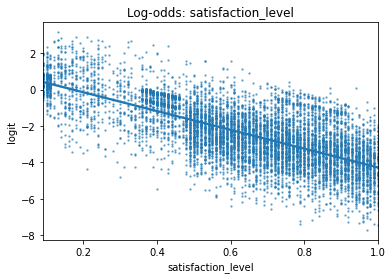

In [218]:
sns.regplot(x='satisfaction_level', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: satisfaction_level');

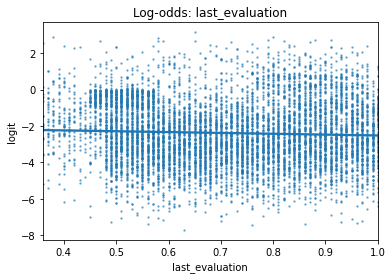

In [219]:
sns.regplot(x='last_evaluation', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: last_evaluation');

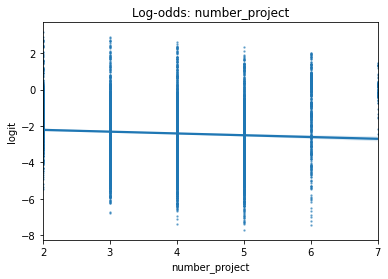

In [220]:
sns.regplot(x='number_project', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: number_project');

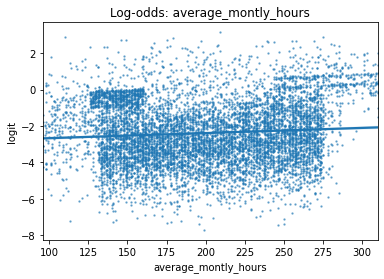

In [221]:
sns.regplot(x='average_montly_hours', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: average_montly_hours');

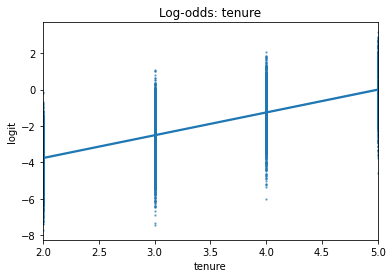

In [222]:
sns.regplot(x='tenure', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: tenure');

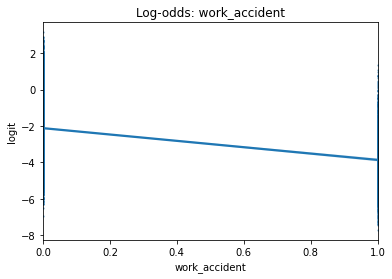

In [223]:
sns.regplot(x='work_accident', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: work_accident');

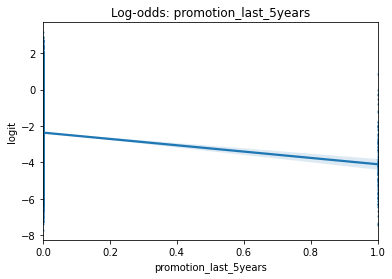

In [224]:
sns.regplot(x='promotion_last_5years', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: promotion_last_5years');

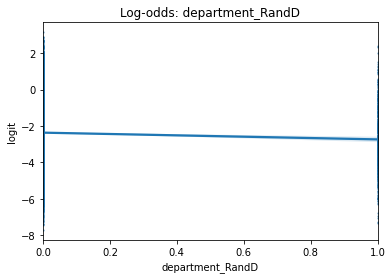

In [225]:
sns.regplot(x='department_RandD', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_RandD');

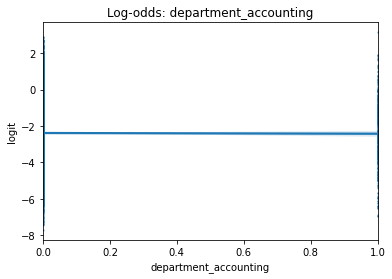

In [226]:
sns.regplot(x='department_accounting', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_accounting');

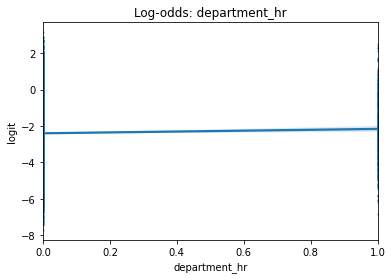

In [227]:
sns.regplot(x='department_hr', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_hr');

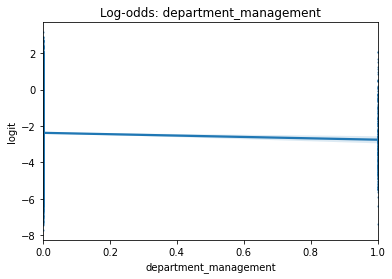

In [228]:
sns.regplot(x='department_management', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_management');

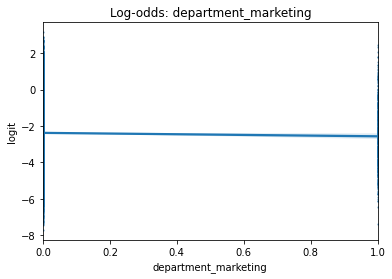

In [229]:
sns.regplot(x='department_marketing', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_marketing');

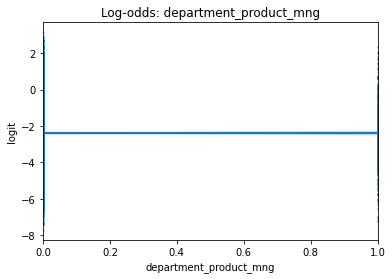

In [230]:
sns.regplot(x='department_product_mng', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_product_mng');

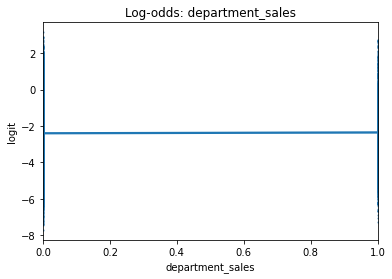

In [231]:
sns.regplot(x='department_sales', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_sales');

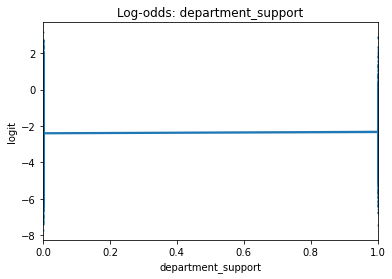

In [232]:
sns.regplot(x='department_support', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_support');

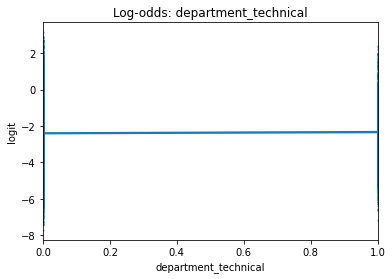

In [233]:
sns.regplot(x='department_technical', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: department_technical');

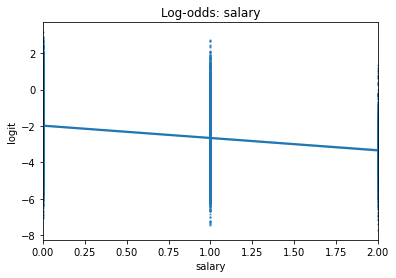

In [234]:
sns.regplot(x='salary', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: salary');

In [235]:
y_preds = model.predict(X_test)

In [236]:
# This is the accuracy
model.score(X_test, y_test)

0.8202005730659025

In [237]:
cm = confusion_matrix(y_test, y_preds, labels = model.classes_)

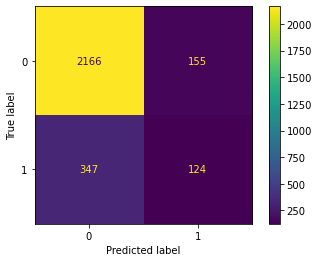

In [238]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model.classes_,
                              )
disp.plot(values_format='')

In [239]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.4444444444444444

In [240]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.2632696390658174

In [241]:
# Create a classification report
target_labels = ['stayed', 'left']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The weighted average of precision, recall, and f1-score for both stayed and left are 79%, 82%, and 80%.  The accuracy is 82%  But if it is most important to predict employees who leave, then the scores are significantly lower.

In [242]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)
feature_importance

[('satisfaction_level', -4.378287156950062),
 ('work_accident', -1.5194740386334438),
 ('tenure', 1.1047685025319212),
 ('promotion_last_5years', -1.02538876490533),
 ('salary', -0.5259595972822318),
 ('number_project', -0.4887709931090933),
 ('department_RandD', -0.32246488347784336),
 ('department_accounting', -0.28523713684936935),
 ('department_management', -0.2028351724752748),
 ('department_marketing', -0.11501033470435981),
 ('department_product_mng', -0.10086302304472265),
 ('department_IT', -0.07828525506495702),
 ('department_support', 0.037431869729770424),
 ('department_sales', 0.016095249266422536),
 ('department_technical', 0.01097596634738211),
 ('last_evaluation', -0.005925298665522393),
 ('department_hr', -0.004327495071379025),
 ('average_montly_hours', 0.0035621306959804154)]

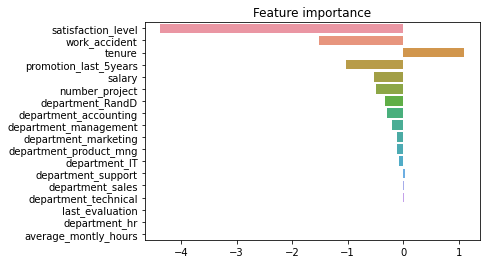

In [243]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

The most important features ranked by degree are:  satisfaction_level, work_accident, tenure, promotion_last_5years, salary, number_project, department_RandD, department_accounting, department_management

What key insights emerged from your model(s)?
- For the key metrics:  Accuracy = 82%, Precision = 44%, Recall = 26%.  
- The model predicts those that don't leave very well.  For those that do leave, 26% correctly predicted is not terrible, but I wouldn't rely on the model if you want to capture a majority of those people who leave.  
- A higher satisfaction level and salary points to a lesser chance of leaving.  Being promoted in the last 5 years points to a lesser chance of leaving.  This is to be expected.  
- Meanwhile, being in management, accounting, or in a R&D department points to a lesser chance of leaving.


What business recommendations do you propose based on the models built?
- We need to delve deeper into what causes satisfaction.  How can we raise satisfaction?
- We might think about paying employees more and giving them more promotions.


What potential recommendations would you make to your manager/company?
- We should evaluate more what is it that makes satisfaction go up or down.  Satisfaction is not strongly correlated with any of the other variables.  We should think of additional questions to ask in the survey.  Maybe we can ask why people are not satisfied?  Satisfaction is the biggest driver of whether someone will leave.   
-  Are we paying employees enough?  Are we paying employees fairly?  Are we paying employees market salaries?  We definitely should look at salaries being paid in our company.
-  Are we promoting employees enough?  Are they stagnating in their positions?  We should make sure employees are progressing through the company so that they stay happy.
-  Find out why higher evaluated employees who work long hours are more likely to leave.  Maybe they are getting better positions / pay at other companies.  Maybe the higher evaluation is not enough of an incentive to stay with the company.  
-  What is so great about working in RandD, accounting and management?

Do you think your model could be improved? Why or why not? How?
- I am not sure how to improve the model.  But I think that the survey could be improved.  You could ask for more specific job positions rather than just the department that an employee works in.  I am sure someone could ask better questions to get into what makes an employee satisfied.  


Given what you know about the data and the models you were using, what other questions could you address for the team?
N/A

What resources do you find yourself using as you complete this stage? (Make sure to include the links.
- I used lectures and labs from earlier in this certificate.  I also used official documentation for pandas and the libraries.  

Do you have any ethical considerations in this stage?
-  No.  

### Summary of model results

- For the key metrics:  Accuracy = 82%, Precision = 79%, Recall = 82%, f1-score = 80% (all weighted averages).
- However, when considering only those who left, which may be more important, Precision = 44%, Recall = 26%, f1-score = 33%.

- The model predicts those that don't leave very well.  For those that do leave, 26% correctly predicted is not terrible, but I wouldn't rely on the model if you want to capture a majority of those people who leave. 

- A higher satisfaction level and salary points to a lesser chance of leaving.  Being promoted in the last 5 years points to a lesser chance of leaving.  This is to be expected.  

- Meanwhile, being in management, accounting or in a R&D department points to a lesser chance of leaving.

              precision    recall  f1-score   support

      stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792

### Conclusion, Recommendations, Next Steps

We should strive to improve employee satisfaction.  It is clear that satisfaction level is the highest determinent of whether an employee will leave.  We should do more research into what increases employee satisfaction, and what doesn't.  

We should research into our pay structure to make sure we are meeting or exceeding the market when it comes to compensation.  It's clear that salary is one reason a person will leave.

Along with salary, we should research into whether we are promoting employees in a timely manner.  Being compensated appropriately as well as moving up in job title is important for employees.

What is it about the 5 and 6 year tenure mark that causes highly satisfied employees to leave?  Perhaps they are high performers and have maxed out at their current positions and wish to make more money and take on more responsibilities.  

Why is that in the last evaluation, higher rated employees who work the most hours are more likely to leave?

Find out what is so great about working in management, accounting and R&D departments.  See if we can have these characteristics in our other departments.

We should get more granular information.  Along with digging into what drives the satisfaction rating, we can do a survey where we ask for the specific position that an employee is in.

Cap the number of projects that an employee can work on to 3 or 4.

Consider promoting those employees who have been with the company for at least 4 years.  Or, further investigate why 4-year tenured employees are so dissatisfied.

Either reward employees for working longer hours, or don't require them to do so.

If employees aren't familiar with the company's overtime pay policies, inform them about this.  If the expectations around workload and time off aren't explicit, make them clear.

Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.  

Higher evaluation scores should not be reserved for those employees who work 200+ hours a month.  Start rewarding results and effort.